In [33]:
import numpy as np
import matplotlib.pyplot as plt

# <span style="color:blue">  Esercizio 8.2 - Stato fondamentale del sistema </span>
# $\langle \hat{H} \rangle_T$ vs SA steps

In [103]:
H_av=np.loadtxt("nsl_simulator/OUTPUT/SA.dat",  usecols=1, skiprows=1)

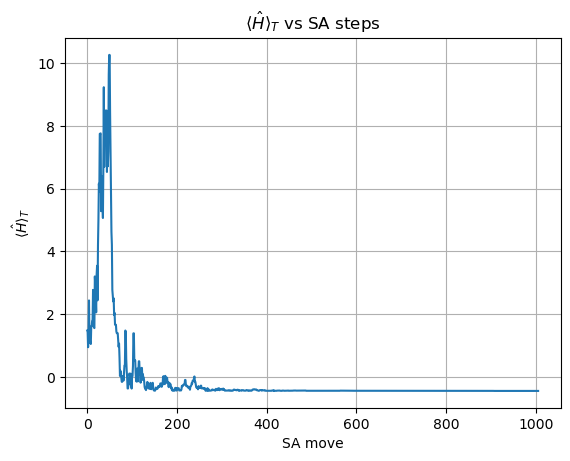

In [105]:
plt.plot([*range(len(H_av))], H_av)
plt.xlabel("SA move")
plt.ylabel(r'$\langle \hat{H} \rangle_T$')
plt.title(r"$\langle \hat{H} \rangle_T$ vs SA steps")
plt.grid()

# Trajectory in variational parameter space

In [108]:
mu=np.loadtxt("nsl_simulator/OUTPUT/SA.dat",  usecols=3, skiprows=1)
sigma=np.loadtxt("nsl_simulator/OUTPUT/SA.dat",  usecols=4, skiprows=1)

Text(0.5, 1.0, 'Trajectory in variational parameter space')

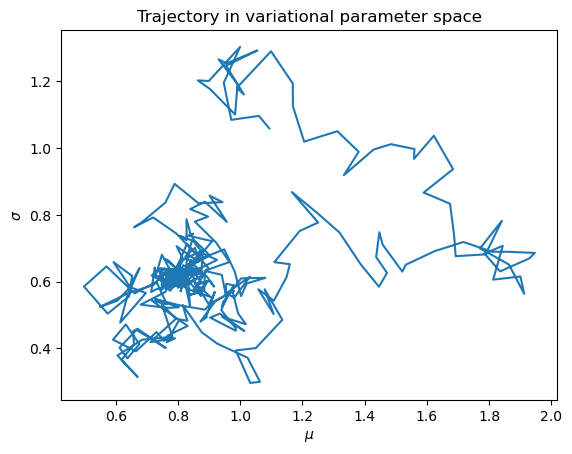

In [110]:
plt.plot(mu, sigma)
plt.xlabel(r"$\mu$")
plt.ylabel(r'$\sigma$')
plt.title("Trajectory in variational parameter space")

# Blocks mean of $\langle \hat{H} \rangle_T$ with $\mu = 0.802098$ and $\sigma = 0.607753$

In [113]:
H_av=np.loadtxt('media_a_blocchi/OUTPUT/H_av.dat', usecols=2, skiprows=1)
H_av_err=np.loadtxt('media_a_blocchi/OUTPUT/H_av.dat', usecols=3, skiprows=1)
blocks=np.loadtxt('media_a_blocchi//OUTPUT/H_av.dat', usecols=0, skiprows=1)

Text(0.5, 1.0, 'Block media $<\\hat{H}>_T$')

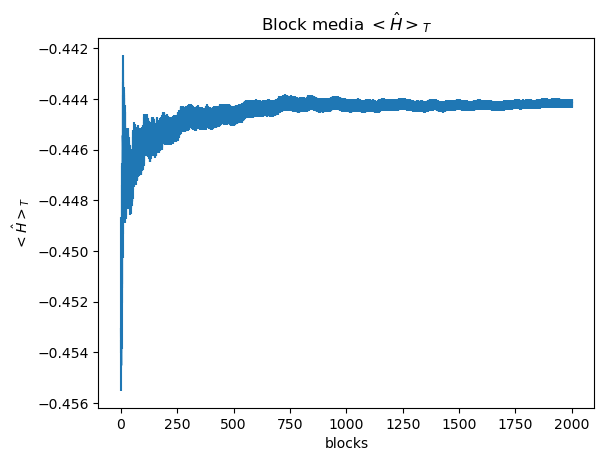

In [115]:
plt.errorbar(blocks, H_av, yerr=H_av_err)
plt.xlabel('blocks')
plt.ylabel(r'$<\hat{H}>_T$')
plt.title(r'Block media $<\hat{H}>_T$')

# $|\Psi_T(x)|^2$ histogram

In [83]:

def plot_psi_histogram(bins, psi_ave, errors, x_theoretical, y_theoretical, x_numerical, y_numerical):
    plt.bar(
        bins,
        psi_ave,
        width=(bins[1] - bins[0]) * 0.9,  # larghezza dinamica
        color="royalblue",
        alpha=0.7,
        edgecolor='black',
        yerr=errors,
        capsize=5,
        linewidth=0.8,
        error_kw=dict(ecolor='black', lw=1.5), 
        label = "Simulated annealing solution"
    )
    plt.plot(
        x_theoretical,
        y_theoretical,
        color = "red", 
        alpha=0.7,
        linewidth = 0.8,
        label = "Theoretical solution"
    )
    plt.plot(x_numerical, y_numerical, color="green", label="Numerical solution (Schrodinger equation)") # plot the potential


    plt.xlabel("Bin", fontsize=12)
    plt.ylabel("ψ (media)", fontsize=12)
    plt.legend()
    plt.title(r"$|\Psi_T(x)|^2$ histogram – last block", fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    plt.tight_layout()

In [85]:
n_bins = 40
bins=np.loadtxt('media_a_blocchi/OUTPUT/psi_squared.dat', skiprows=1, usecols=1)
bins=bins[-n_bins:]
psi_ave=np.loadtxt('media_a_blocchi/OUTPUT/psi_squared.dat', skiprows=1, usecols=2)
psi_ave=psi_ave[-n_bins:]
error=np.loadtxt('media_a_blocchi/OUTPUT/psi_squared.dat', skiprows=1, usecols=3)
error=error[-n_bins:]

In [97]:
x = np.linspace (-2, 2, 500)
mu=0.802098
sigma=0.607753
theoretical = pow((np.exp(-pow((x-mu), 2)/(2*sigma*sigma)) + np.exp(-pow((x+mu), 2)/(2*sigma*sigma))), 2)
theoretical /= float(np.trapz(theoretical, x))


In [99]:

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 4
N = 1000 # number of iterations

# Step sizes
x_numerical = np.linspace(-a/2, a/2, N)
dx = x_numerical[1] - x_numerical[0] # the step size
V = Vpot(x_numerical)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


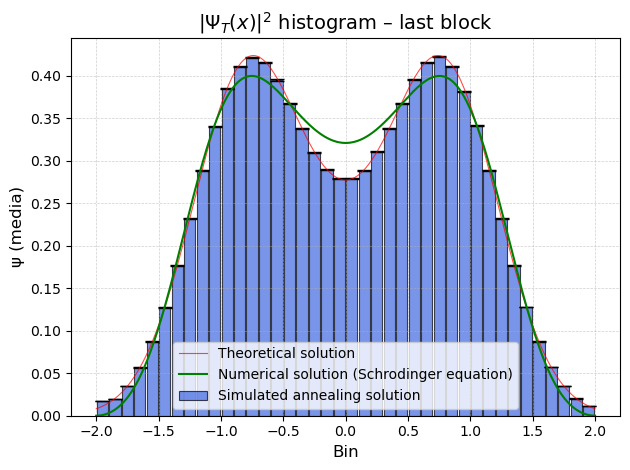

In [101]:
plot_psi_histogram(bins=bins, psi_ave=psi_ave, errors=error, x_theoretical=x, y_theoretical=theoretical, x_numerical=x_numerical, y_numerical=psi[0]**2)

## Commenti
### Scopo dell'esercizio e risultati aspettati
- Utilizzando il codice implementato nell'esercizio precedente che sfruttava il principio variazionale, si vuole trovare l'energia dello stato fondamentale di un sistema non risolvibile analiticamente, sfruttando il simulated annealing. Data una funzione d'onda di prova dipendente dai parametri $\sigma$ e $\mu$, si vuole effettuare un'esplorazione dello spazio dei parametri fino a trovare un minimo globale dell'energia. Questo esplorazione si può effettuare partendo da una temperatura elevata e diminuendola man mano che la simulazione procede.
- Una volta trovati dei buoni parametri $\mu$ e $\sigma$, fare una media a blocchi con un maggior numero di blocchi, per ottenere una stima accurata dell'energia di stato fondamentale.
- Registrare i valori della distribuzione di probabilità di $|\Psi _T (x)|^2$ e confrontarli con la soluzioni teorica e numerica, trovata trasformando l'equazione di Schrodinger in un'equazione matriciale.
- Ci si aspetta dunque di vedere un'esplorazione iniziale dello spazio dei parametri qunado il sistema è ad alta temperatura e poi una stabilizzazione di questi parametri attorno a valori ottimali quando il sistema è a temperature basse. 
### Risultati
- Dalla simulazione con simulated annealing sono stati ottenuti dei parametri ottimali $\mu = 0.802098$ e $\sigma = 0.607753$. La simulazione di SA è stata svolta computando l'energia con 20 blocchi ognuno dei quali con 10000 passi. Ogni volta che la temperatura veniva abbassata venivano eseguiti 20000 passi di equilibrazione del sistema. Ho trovato necessario implementare una funzione di autotuning del parametro dt, che regolava l'ampiezza massima del passo nella simulazione Monte Carlo variazionale. Questa funzione è stata fatta agire soltanto nelle fasi di equilibrazione del sistema, di modo da rispettare il principio del bilancio dettagliato.
- Si osserva effettivamente un'esplorazione iniziale dello spazio dei parametri che poi converge in una zona, presumibilmente vicina al minimo globale.
- Si osserva una convergenza dell'energia di stato fondamentale a $-0.44417\pm 0.000175791$ Ha.
- Nel grafico "$\textit{$|\Psi_T(x)|^2$ histogram – last block}$", si nota che la distribuzione ottenuta con il simulated annealing concide abbastanza bene con la curva teorica ottenuta facendo il modulo quadro della funzione di prova a fissati $\mu$ e $\sigma$. Al contrario la soluzione ottenuta trasformando l'equazione di Schrodinger in un'equazione matriciale è piuttosto diversa da quella prodotta dall'algoritmo di SA. Questo è dovuto al fatto che quest'ultima è l'approssimazione numerica della soluzione vera del sistema. Infatti, la soluzione ottenuta con SA sarà sempre maggiore o uguale alla soluzione vera e quindi anche la funzione d'onda dovrà essere differente.
